# Librairies

In [ ]:

from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Exploratory Data Analysis (EDA):

###  Data Cleaning

In [ ]:
db= pd.read_csv('Unemployment.csv')
db.shape

(768, 7)

In [ ]:
db.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#updating the column names
db.columns=["Region","Date","Frequency","Estimated unemployment rate","Estimated employed","Estimated labour participation rate","Area"]

In [ ]:
db=db.dropna()
#Checking for null values
db.isnull().sum()

Region                                 0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Area                                   0
dtype: int64

In [ ]:
# drop duplicate values
db =db.drop_duplicates()
db.duplicated().any()

False

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated unemployment rate          740 non-null    float64
 4   Estimated employed                   740 non-null    float64
 5   Estimated labour participation rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [ ]:
# Converting "Date" column to Datetime format
db['Date']= pd.to_datetime(db['Date'],dayfirst=True)
#Converting 'Frequency' and 'Region' columns to categorical data type
db[' Frequency'] = db['Frequency'].astype('category')
db['Region'] = db['Region'].astype('category')


###  Descriptive statistics of the dataset

In [ ]:
# Descriptive statistics of the dataset
db.describe()

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
Area_statistique = db.groupby(['Area'])[['Estimated unemployment rate', 'Estimated employed',
                                       'Estimated labour participation rate']].mean().reset_index()
round(Area_statistique, 2)

,Area,Estimated unemployment rate,Estimated employed,Estimated labour participation rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


#Data Visualization

### Which area has a lower unemployment rate

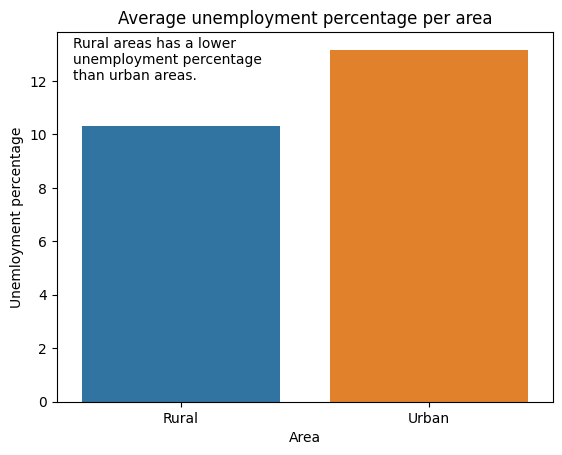

In [ ]:
sns.barplot(db, x='Area', y= 'Estimated unemployment rate', errorbar=None)
plt.figtext(x= 0.15, y= 0.78 , s= 'Rural areas has a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemloyment percentage')
plt.show()

### Interactive bars representing estimated unemployment rates and estimated labor participation rates for each month.

In [20]:
#Extracting Month From Date attribute
db['Month']= db['Date'].dt.month
#converting 'month' to integer format
db['Month_int'] = db['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
db['Month_name'] = db['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [21]:
import calendar
import plotly.graph_objects as go

# Group the data by month and calculate the averages
IMD = db.groupby(["Month"])[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']].mean()
IMD = pd.DataFrame(IMD).reset_index()

# Utilisez le module calendar pour mapper les nombres de mois aux noms des mois
IMD['Month'] = IMD['Month'].apply(lambda x: calendar.month_abbr[x])

# Extract data for visualization
month = IMD.Month
unemployment_rate = IMD["Estimated unemployment rate"]
labour_participation_rate = IMD["Estimated labour participation rate"]

# Create a Plotly figure
fig = go.Figure()

# Add a trace for the unemployment rate
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name="Unemployment Rate"))

# Add a trace for the labour participation rate
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name="Labour Participation Rate"))

# Update the layout of the figure
fig.update_layout(
    title="Unemployment Rate and Labour Participation Rate",
    xaxis={"categoryorder": "array", "categoryarray": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]}
)

# Show the figure
fig.show()


### region Wise Analysis

In [22]:
Region= db.groupby("Region")[['Estimated unemployment rate','Estimated employed','Estimated labour participation rate']].mean()
Region = pd.DataFrame(Region).reset_index()

In [23]:
fig = px.box(db, x='Region', y='Estimated unemployment rate', color='Region', title='Unemployment Rate')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [24]:
fig = px.bar(db, x='Region', y='Estimated unemployment rate', color='Region', title='Unemployment Rate')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()



*   Haryana and Tripura was having the highest average amount of Unemployment Rate
*   Meghalaya and Sikkim was having the lowest average amount of Unemployment Rate

### Scatter Matrix

In [25]:
fig = px.scatter_matrix(db, template='plotly',
                        dimensions=['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate'],
                        color='Area')
fig.show()

### Animated bar plot of Unemployment rate

In [ ]:
fig = px.bar(db, x='Area', y='Estimated unemployment rate', animation_frame='Month_name', color='Region',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

### Sunburst chart

In [ ]:
# Extract relevant data
# Selecting specific columns from the DataFrame to create a subset of relevant data
unemplo_df = db[['Region', 'Area', 'Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]

# Grouping data to find the mean unemployment rate for each Area and Region
unemplo = unemplo_df.groupby(['Area', 'Region'])['Estimated unemployment rate'].mean().reset_index()

# Create Sunburst chart with reduced height
# Using Plotly Express to create a Sunburst chart with the mean unemployment rate for each Area and Region
fig = px.sunburst(
    unemplo,
    path=['Area', 'Region'],
    values='Estimated unemployment rate',
    color_continuous_scale='Plasma',
    title='Unemployment rate in each Area and Region',
    height=600,  # Adjust the height here
    template='ggplot2'
)

# Show the chart
# Displaying the Sunburst chart
fig.show()


#Conclusion


After analyzing the dataset, we have obtained information that can give us an insight into the effects of Covid-19 on different states of India. First, the peak of the crisis in April 2020 led to a sharp decline in the labor force participation rate, reaching its lowest level during this period. Second, from the visualizations, we found that urban areas had a higher unemployment rate than rural areas. Although there are states like Meghalaya which have the least number of employees, it also has the lowest unemployment rate. While other states, like Puducherry, have been heavily affected by the crisis.